### Notes
1. May need different dropout rate

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/r8user2/fastai/old')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import matplotlib.pyplot as plt

In [2]:
# Selected data
#PATH = '/home/r8user2/Documents/HY/dress_data/alex_workplace/dressdata_project/git_workplace/selected_gd_data_5'
# Full data
PATH = '/home/r8user2/Documents/HY/dress_data/datasets'
sz = 299

In [3]:
arch = resnext50
data = ImageClassifierData.from_paths(path = PATH,
                                      tfms = tfms_from_model(arch, sz),
                                      trn_name = 'imgtrain',
                                      val_name = 'imgval',
                                      # utilize CPUs in remote
                                      num_workers = 60)
learn = ConvLearner.pretrained(arch, data, precompute = True)

100%|██████████| 939/939 [19:42<00:00,  1.06s/it]


In [4]:
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy                     
    0      4.264416   4.075781   0.137711  
    1      4.163078   3.956611   0.155008                     
    2      4.032585   3.875349   0.167727                     



[array([3.87535]), 0.16772657654682863]

In [5]:
learn.save('temp')

In [6]:
learn.lr_find(1e-4, 1e-1)

epoch      trn_loss   val_loss   accuracy                     
    0      4.324201   4.13524    0.126174  



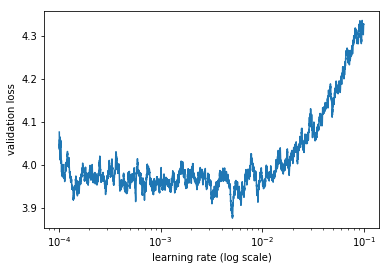

In [7]:
learn.sched.plot()

In [10]:
learn.load('temp')
learn.lr_find(1e-7, 1e-4)

epoch      trn_loss   val_loss   accuracy                     
    0      3.956265   3.874201   0.167044  



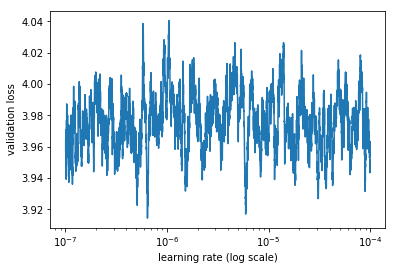

In [11]:
learn.sched.plot()

In [13]:
learn.load('temp')
learn.fit(1e-3, 40)

epoch      trn_loss   val_loss   accuracy                     
    0      3.969102   3.830474   0.174985  
    1      3.914014   3.80586    0.178331                     
    2      3.906415   3.79028    0.181511                     
    3      3.889633   3.776615   0.184741                     
    4      3.880442   3.760977   0.187071                     
    5      3.880585   3.752524   0.189469                     
    6      3.859876   3.735742   0.191133                     
    7      3.89483    3.730567   0.192049                     
    8      3.838606   3.717755   0.19403                      
    9      3.866065   3.707646   0.195928                     
    10     3.823826   3.704618   0.198825                     
    11     3.797977   3.694311   0.199374                     
    12     3.834128   3.684656   0.201355                     
    13     3.821097   3.677006   0.202803                     
    14     3.798065   3.669836   0.205051                     
    15     

[array([3.52369]), 0.23321901844774603]

In [20]:
import timeit
start = timeit.timeit()
learn.load('temp')
learn.fit(1e-3, 6, cycle_len = 1, cycle_mult = 2)
end = timeit.timeit()
print('%d mins' % ((start-end)/60))

epoch      trn_loss   val_loss   accuracy                     
    0      4.000167   3.849134   0.172738  
    1      3.943682   3.826519   0.176084                     
    2      3.944191   3.820178   0.175834                     
    3      3.968667   3.805114   0.180162                     
    4      3.885766   3.788381   0.182726                     
    5      3.860816   3.782449   0.184091                     
    6      3.886572   3.782232   0.183925                     
    7      3.880536   3.768728   0.185956                     
    8      3.855892   3.757045   0.189052                     
    9      3.880414   3.746034   0.190651                     
    10     3.823977   3.736697   0.191516                     
    11     3.844565   3.730794   0.192382                     
    12     3.849772   3.73061    0.192782                     
    13     3.825048   3.727972   0.193314                     
    14     3.810341   3.729058   0.192898                     
    15     

In [15]:
start = timeit.timeit()
learn.load('temp')
learn.fit(1e-3, 20, cycle_len = 1, )
end = timeit.timeit()
print('%d mins' % ((start-end)/60))

epoch      trn_loss   val_loss   accuracy                     
    0      3.964783   3.845497   0.172122  
    1      3.946621   3.828233   0.175235                     
    2      3.943526   3.817588   0.177299                     
    3      3.949405   3.806789   0.178181                     
    4      3.945222   3.796032   0.180229                     
    5      3.872844   3.791925   0.181861                     
    6      3.898518   3.781183   0.183725                     
    7      3.879763   3.774632   0.184974                     
    8      3.898159   3.767337   0.186139                     
    9      3.851942   3.76076    0.187471                     
    10     3.865032   3.753008   0.18842                      
    11     3.829363   3.74987    0.189485                     
    12     3.885757   3.742487   0.19105                      
    13     3.829669   3.740925   0.191317                     
    14     3.842808   3.729898   0.1915                       

0 mins


In [18]:
learn.lr_find(linear = True)

  8%|▊         | 561/7435 [00:11<03:02, 37.75it/s, loss=14.3] 

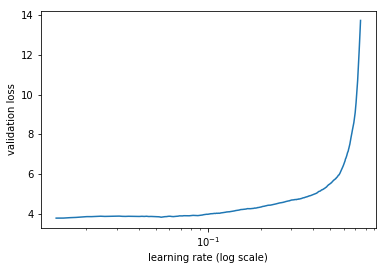

In [19]:
learn.sched.plot()